In [53]:
import pandas as pd
db = pd.read_csv('https://data.alexmattyou.repl.co/db/simpillearn-demo/Lesson-7/zoo.csv')
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [54]:
import numpy as np
labels = db['class_type']
np.unique(labels.values)

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

<AxesSubplot:>

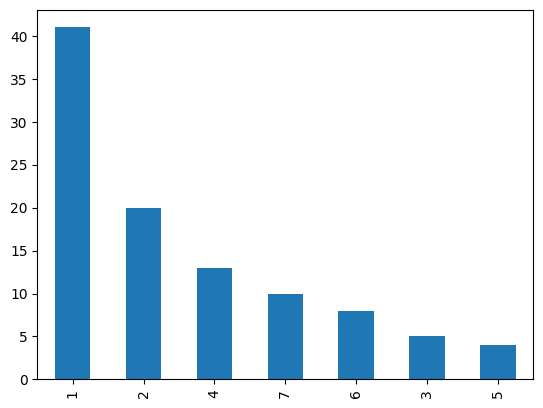

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots()
(labels.value_counts()).plot(ax=ax,kind='bar')

In [56]:
features = db.values[:,1:-1]
features

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=object)

In [57]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

alg = AgglomerativeClustering(n_clusters=7,linkage='average',affinity='cosine')
alg.fit(features)
np.unique(alg.labels_)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [58]:
labels = labels-1

In [59]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(labels, alg.labels_))
#RMSC

2.4373333911071624

In [60]:
#answer
alg.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)